Исходные данные

* P=0,3
* D=0,3
* I=0,001
* скорость 12

Иногда проходит очень ровно, но иногда срывается. В журнале 7_breakdown_03_03_001_12.log срыв происходит на прямой линии

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from loader import load_data 
sys.path.append("../src")
from alphabot.pid_module import PidController

In [2]:
data = load_data('./data/6_breakdown_03_03_001_12.log')
sensor0=data['sensor0']
sensor1=data['sensor1']
sensor2=data['sensor2']
sensor3=data['sensor3']
sensor4=data['sensor4']
left_pid_out = data['left_pid_out']
right_pid_out = data['right_pid_out']
actual_right_pid_out = []

In [3]:
print (len(sensor0))

6100


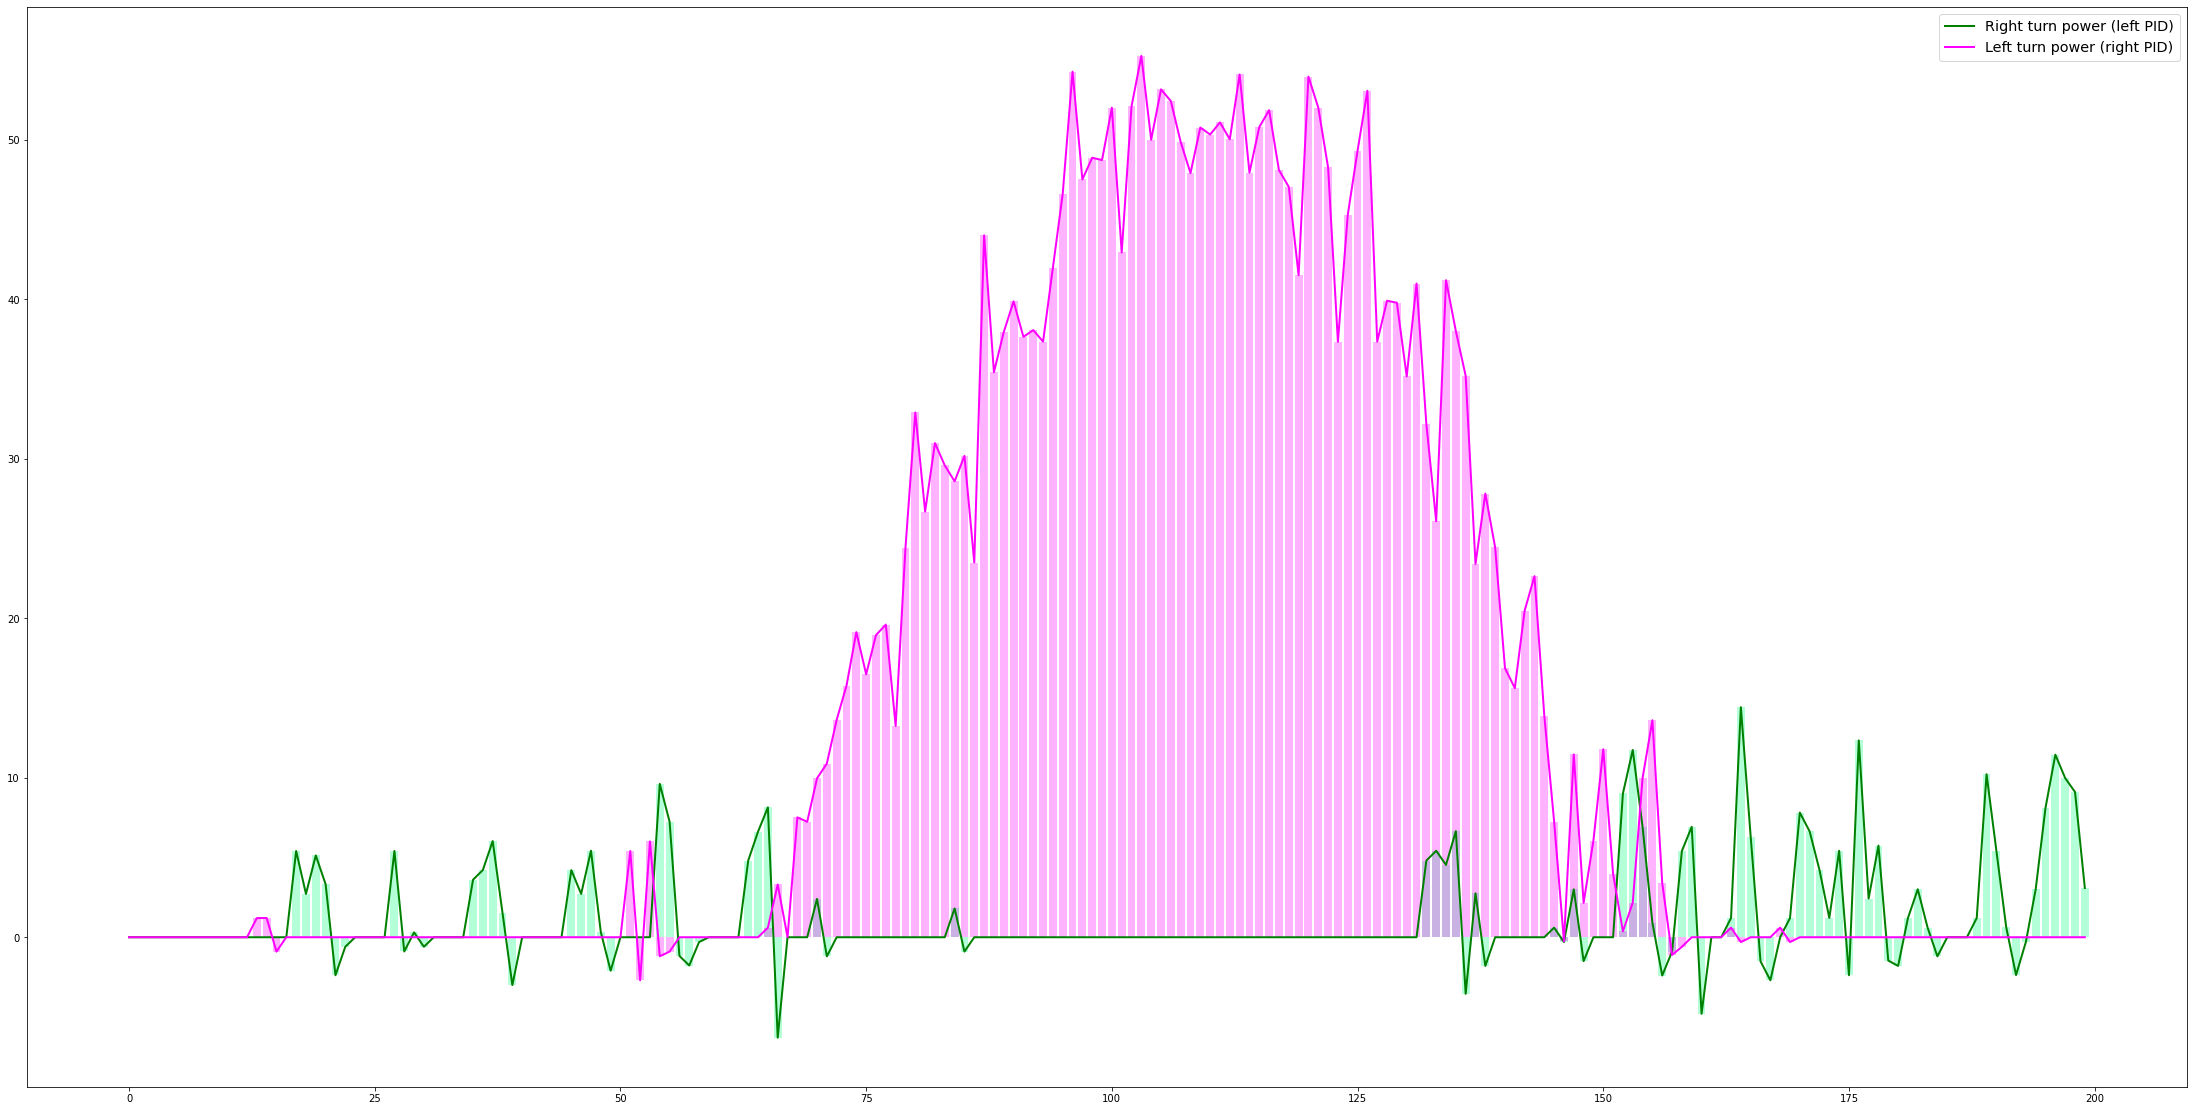

In [4]:
range_len = 200
start = 1500
end = start + range_len
fig = plt.figure(figsize=(30, 15))
ax = fig.add_axes([0,0,1,1])

#ax.plot(sensor1[start:end], linewidth=2.0, color = 'red', label='Left sensor')
#ax.bar(np.arange(0,range,1), sensor1[start:end], color = 'tomato', alpha = 0.3)
#ax.plot(sensor3[start:end], linewidth=2.0, color = 'blue', label = 'Right sensor')
#ax.bar(np.arange(0,range,1), sensor3[start:end], color = 'skyblue', alpha = 0.3)

ax.plot(left_pid_out[start:end], linewidth=2.0, color = 'green', label = 'Right turn power (left PID)')
ax.bar(np.arange(0,range_len,1), left_pid_out[start:end], alpha = 0.3, color = 'springgreen')
ax.plot(right_pid_out[start:end], linewidth=2.0, color = 'magenta', label = 'Left turn power (right PID)')
ax.bar(np.arange(0,range_len,1), right_pid_out[start:end], alpha = 0.3, color = 'magenta')
ax.legend(fontsize = 'x-large')


Что нужно делать:

* Попробовать уменьшить KP и KD
* Обрабатывать отрицательный PID при приближении к нулю
* Сделать более точную калибровку
* Выставить правильный период изменения сейчас dt всегда 1
* Не усиливать P значением D, а только гасить 
* Получать значение по среднему из трех измерений

Обработка отрицательного PID

In [5]:
MAX_OUT = 100
LEFT_TARGET_VALUE = 265
RIGHT_TARGET_VALUE = 247

KP = 0.2
KD = 0.3
KI = 0.001
l_pid = PidController(KP, KI, KD, LEFT_TARGET_VALUE, MAX_OUT)
r_pid = PidController(KP, KI, KD, RIGHT_TARGET_VALUE, MAX_OUT)
left_pid_out_model, right_pid_out_model = [],[]

In [6]:

for x in range(0,len(sensor1)):
    left_pid_out_model.append(l_pid.getOutput(sensor1[x], 1))
    right_pid_out_model.append(r_pid.getOutput(sensor3[x], 1))
    if left_pid_out_model[x] < 0 and right_pid_out_model[x] < 0:
        if left_pid_out_model[x] < right_pid_out_model[x]:
            right_pid_out_model[x] = 0
        elif right_pid_out_model[x] < left_pid_out_model[x]:
            left_pid_out_model[x] = 0
    left_pid_out_model[x] = left_pid_out_model[x]*-1
    right_pid_out_model[x] = right_pid_out_model[x]*-1

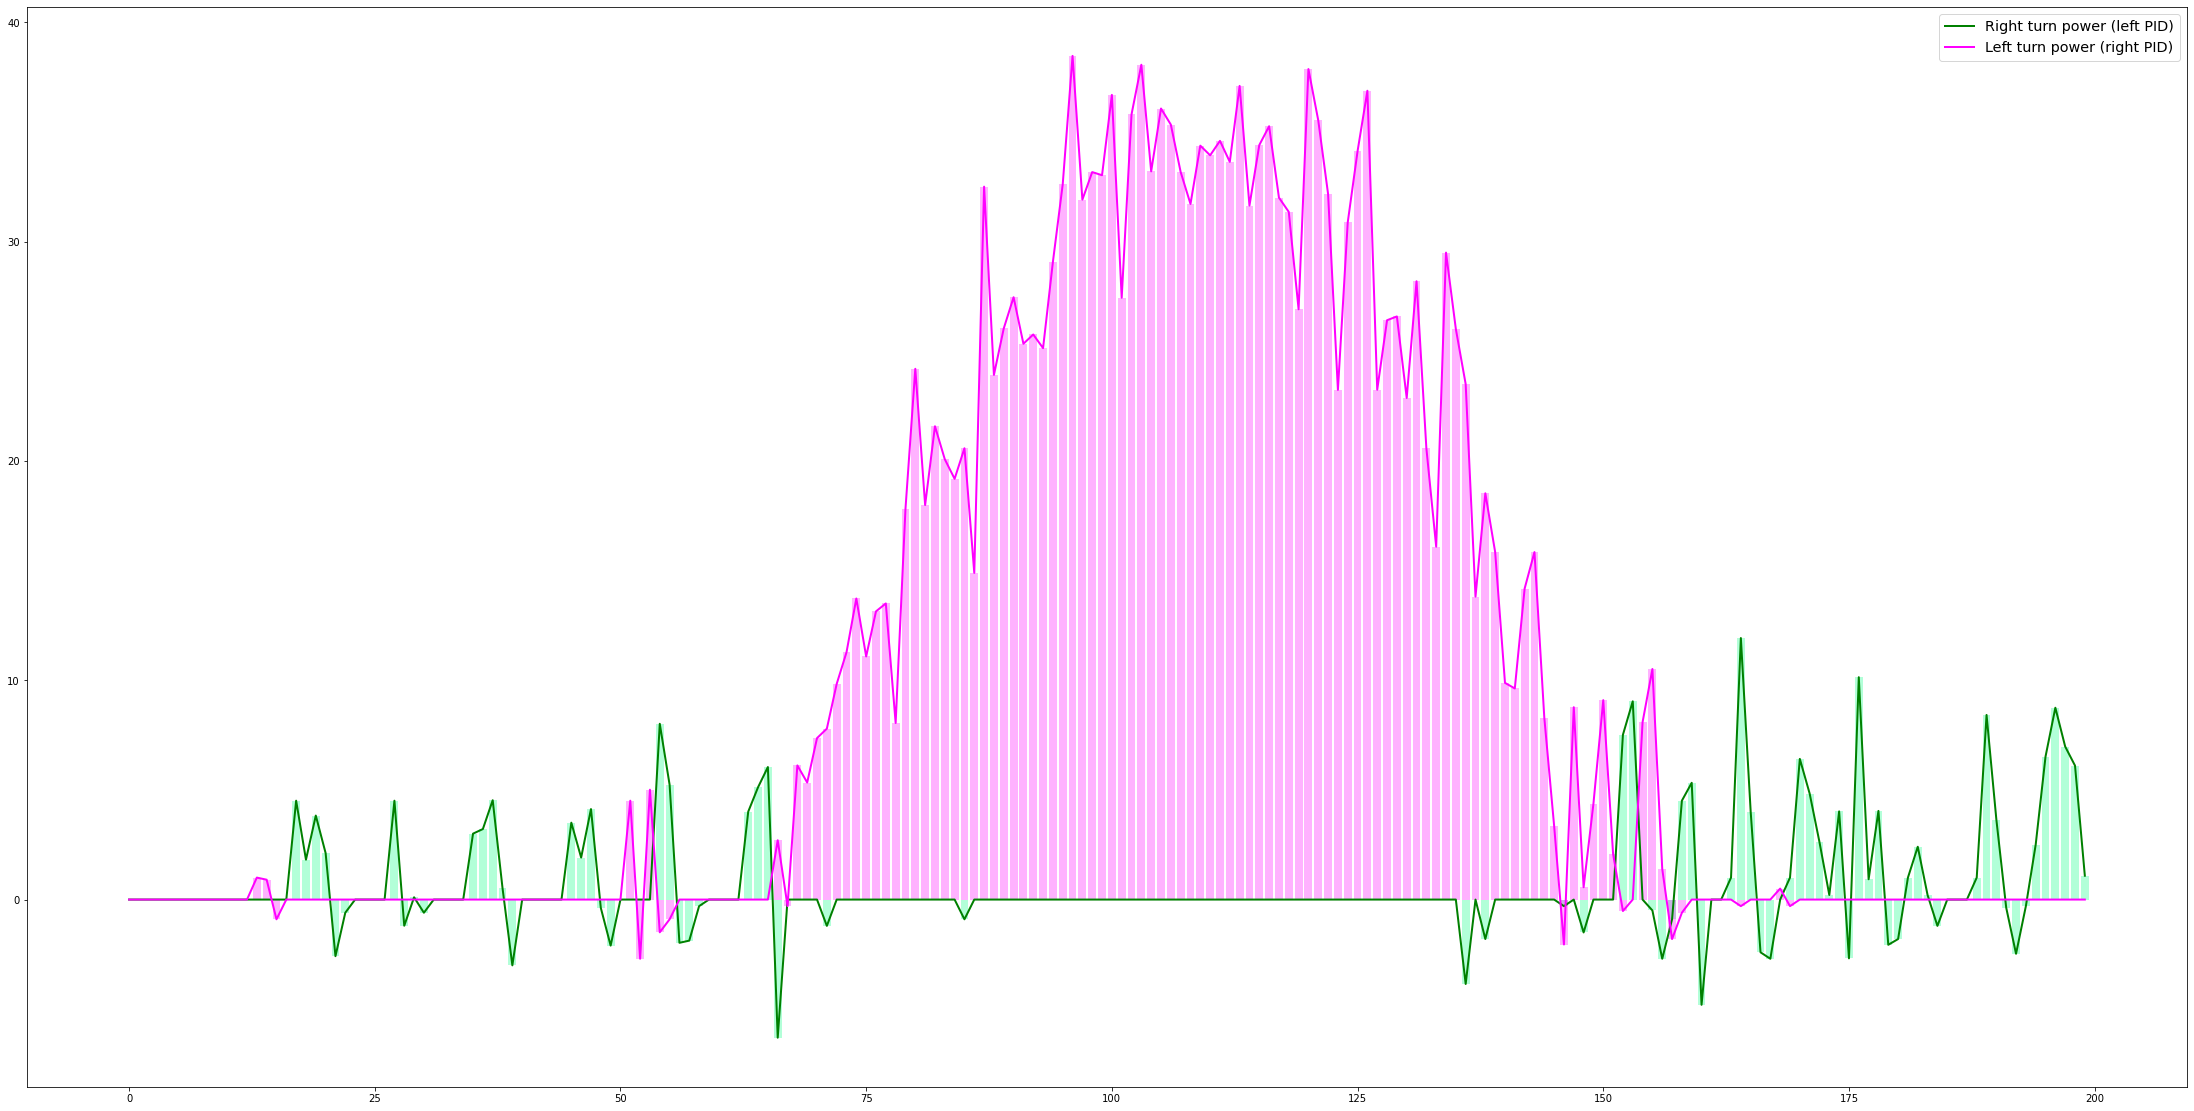

In [7]:
range_len = 200
start = 1500
end = start + range_len
fig = plt.figure(figsize=(30, 15))
ax = fig.add_axes([0,0,1,1])


ax.plot(left_pid_out_model[start:end], linewidth=2.0, color = 'green', label = 'Right turn power (left PID)')
ax.bar(np.arange(0,range_len,1), left_pid_out_model[start:end], alpha = 0.3, color = 'springgreen')
ax.plot(right_pid_out_model[start:end], linewidth=2.0, color = 'magenta', label = 'Left turn power (right PID)')
ax.bar(np.arange(0,range_len,1), right_pid_out_model[start:end], alpha = 0.3, color = 'magenta')

#ax.plot(left_pid_out[start:end], linewidth=2.0, color = 'green', label = 'Right turn power (left PID)')
#ax.bar(np.arange(0,range,1), left_pid_out[start:end], alpha = 0.3, color = 'springgreen')
#ax.plot(right_pid_out[start:end], linewidth=2.0, color = 'red', label = 'Left turn power (right PID)')
#ax.bar(np.arange(0,range,1), right_pid_out[start:end], alpha = 0.3, color = 'red')

ax.legend(fontsize = 'x-large')